In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

17

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/45".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/45
number of class1:641
number of class2:976

 ****** Running generation 0 ****** 

Population's average fitness: 0.52717 stdev: 0.08694
Best fitness: 0.71490 - size: (2, 13) - species 1 - id 68
Average adjusted fitness: 0.220
Mean genetic distance 2.900, standard deviation 0.490
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 23.463 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55498 stdev: 0.08424
Best fitness: 0.74706 - size: (2, 14) - species 6 - id 201
Average adjusted fitness: 0.211
Mean genetic distance 3.018, standard deviation 0.488
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 22.492 sec (22.978 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56157 stdev: 0.08655
Best fitness: 0.74706 - size: (2, 14) - species 10 - id 201
Average adjusted fitness: 0.282
Mean genetic distance 3.058, standard deviation 0.475
Population of 200 members in 37 species

Population's average fitness: 0.63666 stdev: 0.08803
Best fitness: 0.82684 - size: (5, 20) - species 43 - id 1775
Average adjusted fitness: 0.283
Mean genetic distance 3.290, standard deviation 0.499
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 27.024 sec (28.432 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64117 stdev: 0.08695
Best fitness: 0.82870 - size: (6, 20) - species 43 - id 3318
Average adjusted fitness: 0.266
Mean genetic distance 3.296, standard deviation 0.494
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 27.126 sec (27.647 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64061 stdev: 0.08717
Best fitness: 0.82870 - size: (6, 20) - species 43 - id 3318
Average adjusted fitness: 0.297
Mean genetic distance 3.285, standard deviation 0.497
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 27.099 sec (27.295 average)

 

Population's average fitness: 0.65699 stdev: 0.09549
Best fitness: 0.83921 - size: (3, 18) - species 27 - id 3817
Average adjusted fitness: 0.255
Mean genetic distance 3.274, standard deviation 0.523
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 28.347 sec (27.889 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.64825 stdev: 0.09802
Best fitness: 0.83921 - size: (3, 18) - species 27 - id 3817
Average adjusted fitness: 0.370
Mean genetic distance 3.252, standard deviation 0.537
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 28.714 sec (28.097 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65034 stdev: 0.09595
Best fitness: 0.83921 - size: (3, 18) - species 27 - id 3817
Average adjusted fitness: 0.283
Mean genetic distance 3.239, standard deviation 0.538
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 29.258 sec (28.224 average)

 

Population's average fitness: 0.59258 stdev: 0.08605
Best fitness: 0.78417 - size: (6, 18) - species 14 - id 978
Average adjusted fitness: 0.252
Mean genetic distance 3.146, standard deviation 0.471
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 21.820 sec (20.128 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59149 stdev: 0.08713
Best fitness: 0.78417 - size: (6, 18) - species 14 - id 978
Average adjusted fitness: 0.252
Mean genetic distance 3.149, standard deviation 0.487
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 22.576 sec (20.478 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59758 stdev: 0.09537
Best fitness: 0.78479 - size: (6, 18) - species 14 - id 1249
Average adjusted fitness: 0.257
Mean genetic distance 3.198, standard deviation 0.486
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 22.679 sec (20.753 average)

 ****

Population's average fitness: 0.62213 stdev: 0.09998
Best fitness: 0.78664 - size: (7, 21) - species 41 - id 2371
Average adjusted fitness: 0.315
Mean genetic distance 3.269, standard deviation 0.515
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 25.461 sec (24.465 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62151 stdev: 0.09944
Best fitness: 0.78664 - size: (7, 21) - species 41 - id 2371
Average adjusted fitness: 0.224
Mean genetic distance 3.293, standard deviation 0.534
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 25.361 sec (24.729 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62670 stdev: 0.09905
Best fitness: 0.78664 - size: (7, 21) - species 41 - id 2371
Average adjusted fitness: 0.294
Mean genetic distance 3.303, standard deviation 0.545
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 25.193 sec (24.812 average)

 

Population's average fitness: 0.63355 stdev: 0.11124
Best fitness: 0.79530 - size: (9, 27) - species 49 - id 7657
Average adjusted fitness: 0.261
Mean genetic distance 3.291, standard deviation 0.607
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 31.188 sec (28.863 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.63783 stdev: 0.11091
Best fitness: 0.79530 - size: (9, 27) - species 49 - id 7657
Average adjusted fitness: 0.237
Mean genetic distance 3.282, standard deviation 0.589
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 30.687 sec (29.089 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.63192 stdev: 0.11619
Best fitness: 0.79530 - size: (9, 27) - species 49 - id 7657
Average adjusted fitness: 0.263
Mean genetic distance 3.299, standard deviation 0.588
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 29.981 sec (29.406 average)

 

Population's average fitness: 0.68818 stdev: 0.09661
Best fitness: 0.79468 - size: (5, 18) - species 36 - id 1448
Average adjusted fitness: 0.455
Mean genetic distance 3.075, standard deviation 0.481
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 22.262 sec (20.845 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67683 stdev: 0.11264
Best fitness: 0.79468 - size: (5, 18) - species 36 - id 1448
Average adjusted fitness: 0.411
Mean genetic distance 3.082, standard deviation 0.474
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 21.702 sec (21.125 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67537 stdev: 0.10984
Best fitness: 0.79468 - size: (5, 18) - species 36 - id 1448
Average adjusted fitness: 0.381
Mean genetic distance 3.092, standard deviation 0.460
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 22.237 sec (21.373 average)

 

Population's average fitness: 0.70391 stdev: 0.09927
Best fitness: 0.83859 - size: (7, 22) - species 36 - id 4213
Average adjusted fitness: 0.408
Mean genetic distance 3.188, standard deviation 0.516
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 25.893 sec (26.038 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.68971 stdev: 0.10853
Best fitness: 0.83859 - size: (7, 22) - species 36 - id 4213
Average adjusted fitness: 0.406
Mean genetic distance 3.192, standard deviation 0.530
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 26.131 sec (26.152 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.69330 stdev: 0.10784
Best fitness: 0.83859 - size: (7, 22) - species 36 - id 4213
Average adjusted fitness: 0.397
Mean genetic distance 3.170, standard deviation 0.545
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 26.596 sec (26.281 average)

 

Population's average fitness: 0.68918 stdev: 0.11653
Best fitness: 0.84725 - size: (7, 23) - species 36 - id 6541
Average adjusted fitness: 0.392
Mean genetic distance 3.183, standard deviation 0.597
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 31.197 sec (30.486 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.70143 stdev: 0.10904
Best fitness: 0.84725 - size: (7, 23) - species 36 - id 6541
Average adjusted fitness: 0.403
Mean genetic distance 3.173, standard deviation 0.606
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 31.920 sec (30.738 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.69824 stdev: 0.10958
Best fitness: 0.84725 - size: (7, 23) - species 36 - id 6541
Average adjusted fitness: 0.407
Mean genetic distance 3.176, standard deviation 0.616
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 30.895 sec (30.801 average)

 

Population's average fitness: 0.63230 stdev: 0.12962
Best fitness: 0.76994 - size: (5, 20) - species 14 - id 2002
Average adjusted fitness: 0.335
Mean genetic distance 3.184, standard deviation 0.523
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 23.641 sec (22.875 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65135 stdev: 0.11265
Best fitness: 0.76994 - size: (5, 20) - species 14 - id 2002
Average adjusted fitness: 0.371
Mean genetic distance 3.218, standard deviation 0.519
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 23.280 sec (22.951 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64381 stdev: 0.12035
Best fitness: 0.76994 - size: (5, 20) - species 14 - id 2002
Average adjusted fitness: 0.345
Mean genetic distance 3.222, standard deviation 0.541
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 24.019 sec (23.130 average)

 

Population's average fitness: 0.66423 stdev: 0.11200
Best fitness: 0.77427 - size: (8, 22) - species 6 - id 4886
Average adjusted fitness: 0.373
Mean genetic distance 3.160, standard deviation 0.573
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 27.316 sec (26.711 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.66072 stdev: 0.11329
Best fitness: 0.78108 - size: (10, 26) - species 6 - id 6164
Average adjusted fitness: 0.364
Mean genetic distance 3.229, standard deviation 0.553
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 27.630 sec (26.858 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.65076 stdev: 0.12582
Best fitness: 0.78108 - size: (10, 26) - species 6 - id 6164
Average adjusted fitness: 0.350
Mean genetic distance 3.217, standard deviation 0.533
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 28.566 sec (27.113 average)

 *

Population's average fitness: 0.65613 stdev: 0.12523
Best fitness: 0.79344 - size: (11, 28) - species 40 - id 7117
Average adjusted fitness: 0.360
Mean genetic distance 3.203, standard deviation 0.618
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 31.383 sec (30.694 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.65273 stdev: 0.12693
Best fitness: 0.79344 - size: (11, 28) - species 40 - id 7117
Average adjusted fitness: 0.349
Mean genetic distance 3.263, standard deviation 0.619
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 30.745 sec (30.706 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.63286 stdev: 0.14757
Best fitness: 0.79344 - size: (11, 28) - species 40 - id 7117
Average adjusted fitness: 0.335
Mean genetic distance 3.300, standard deviation 0.619
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 31.204 sec (30.900 average)

Population's average fitness: 0.60915 stdev: 0.07610
Best fitness: 0.74706 - size: (6, 20) - species 24 - id 2718
Average adjusted fitness: 0.182
Mean genetic distance 3.213, standard deviation 0.507
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 25.436 sec (23.820 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61057 stdev: 0.07589
Best fitness: 0.75510 - size: (7, 22) - species 24 - id 2842
Average adjusted fitness: 0.146
Mean genetic distance 3.272, standard deviation 0.510
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 25.276 sec (24.060 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.60565 stdev: 0.07663
Best fitness: 0.75510 - size: (7, 22) - species 24 - id 2842
Average adjusted fitness: 0.205
Mean genetic distance 3.250, standard deviation 0.511
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 25.546 sec (24.264 average)

 

Population's average fitness: 0.63885 stdev: 0.08048
Best fitness: 0.77737 - size: (10, 32) - species 55 - id 5780
Average adjusted fitness: 0.202
Mean genetic distance 3.340, standard deviation 0.522
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 32.193 sec (29.500 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.62927 stdev: 0.08595
Best fitness: 0.77737 - size: (10, 32) - species 55 - id 5780
Average adjusted fitness: 0.156
Mean genetic distance 3.333, standard deviation 0.534
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 31.036 sec (29.791 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.63510 stdev: 0.08989
Best fitness: 0.77737 - size: (10, 32) - species 55 - id 5780
Average adjusted fitness: 0.247
Mean genetic distance 3.329, standard deviation 0.540
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 31.233 sec (30.109 average)

Population's average fitness: 0.51692 stdev: 0.05471
Best fitness: 0.64997 - size: (2, 13) - species 5 - id 185
Average adjusted fitness: 0.126
Mean genetic distance 2.986, standard deviation 0.471
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 19.356 sec (18.583 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53093 stdev: 0.06222
Best fitness: 0.66852 - size: (3, 14) - species 19 - id 534
Average adjusted fitness: 0.162
Mean genetic distance 3.025, standard deviation 0.493
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 19.855 sec (19.007 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54217 stdev: 0.06698
Best fitness: 0.71738 - size: (4, 18) - species 23 - id 615
Average adjusted fitness: 0.173
Mean genetic distance 3.044, standard deviation 0.512
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 20.651 sec (19.418 average)

 ******

Population's average fitness: 0.60031 stdev: 0.07371
Best fitness: 0.73098 - size: (7, 24) - species 23 - id 3262
Average adjusted fitness: 0.163
Mean genetic distance 3.260, standard deviation 0.497
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 25.842 sec (25.584 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60983 stdev: 0.06915
Best fitness: 0.73098 - size: (7, 24) - species 23 - id 3262
Average adjusted fitness: 0.199
Mean genetic distance 3.263, standard deviation 0.491
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 25.251 sec (25.648 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.61289 stdev: 0.06742
Best fitness: 0.73098 - size: (7, 24) - species 23 - id 3262
Average adjusted fitness: 0.188
Mean genetic distance 3.246, standard deviation 0.489
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 26.236 sec (25.762 average)

 

Population's average fitness: 0.62012 stdev: 0.07844
Best fitness: 0.75387 - size: (7, 24) - species 5 - id 6645
Average adjusted fitness: 0.248
Mean genetic distance 3.275, standard deviation 0.565
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 30.682 sec (29.549 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62664 stdev: 0.07427
Best fitness: 0.75387 - size: (7, 24) - species 5 - id 6645
Average adjusted fitness: 0.217
Mean genetic distance 3.284, standard deviation 0.571
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 30.542 sec (29.833 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.62239 stdev: 0.07861
Best fitness: 0.75387 - size: (7, 24) - species 5 - id 6645
Average adjusted fitness: 0.220
Mean genetic distance 3.279, standard deviation 0.593
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 30.564 sec (30.059 average)

 ***

Population's average fitness: 0.61103 stdev: 0.08677
Best fitness: 0.76129 - size: (4, 15) - species 2 - id 914
Average adjusted fitness: 0.286
Mean genetic distance 3.147, standard deviation 0.515
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 22.354 sec (20.876 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61050 stdev: 0.08959
Best fitness: 0.76129 - size: (4, 15) - species 5 - id 914
Average adjusted fitness: 0.240
Mean genetic distance 3.158, standard deviation 0.524
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 21.936 sec (21.009 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61605 stdev: 0.08610
Best fitness: 0.76129 - size: (4, 15) - species 5 - id 914
Average adjusted fitness: 0.243
Mean genetic distance 3.140, standard deviation 0.520
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 22.543 sec (21.179 average)

 ****** R

Population's average fitness: 0.65872 stdev: 0.08955
Best fitness: 0.80519 - size: (7, 19) - species 5 - id 3030
Average adjusted fitness: 0.303
Mean genetic distance 3.259, standard deviation 0.541
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 26.135 sec (24.723 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.65070 stdev: 0.09217
Best fitness: 0.80519 - size: (7, 19) - species 5 - id 3030
Average adjusted fitness: 0.257
Mean genetic distance 3.259, standard deviation 0.548
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 25.381 sec (24.874 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65742 stdev: 0.08674
Best fitness: 0.80519 - size: (7, 19) - species 5 - id 3030
Average adjusted fitness: 0.281
Mean genetic distance 3.259, standard deviation 0.537
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 26.215 sec (25.066 average)

 ***

Population's average fitness: 0.66188 stdev: 0.09462
Best fitness: 0.82066 - size: (7, 17) - species 2 - id 4739
Average adjusted fitness: 0.256
Mean genetic distance 3.345, standard deviation 0.591
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 28.854 sec (28.441 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.65862 stdev: 0.09395
Best fitness: 0.82066 - size: (7, 17) - species 2 - id 4739
Average adjusted fitness: 0.262
Mean genetic distance 3.339, standard deviation 0.565
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 30.419 sec (28.721 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.65378 stdev: 0.09191
Best fitness: 0.82066 - size: (7, 17) - species 2 - id 4739
Average adjusted fitness: 0.277
Mean genetic distance 3.310, standard deviation 0.581
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 29.590 sec (28.935 average)

 ***

Population's average fitness: 0.63896 stdev: 0.12496
Best fitness: 0.77922 - size: (4, 17) - species 28 - id 1078
Average adjusted fitness: 0.336
Mean genetic distance 3.159, standard deviation 0.524
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 23.711 sec (22.579 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65382 stdev: 0.11819
Best fitness: 0.77922 - size: (4, 17) - species 28 - id 1078
Average adjusted fitness: 0.337
Mean genetic distance 3.147, standard deviation 0.522
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 24.520 sec (23.000 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65432 stdev: 0.11059
Best fitness: 0.77922 - size: (4, 17) - species 28 - id 1078
Average adjusted fitness: 0.341
Mean genetic distance 3.170, standard deviation 0.529
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 24.532 sec (23.324 average)

 

Population's average fitness: 0.66022 stdev: 0.12304
Best fitness: 0.81942 - size: (10, 25) - species 5 - id 2920
Average adjusted fitness: 0.356
Mean genetic distance 3.379, standard deviation 0.518
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 27.605 sec (27.421 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.66875 stdev: 0.12418
Best fitness: 0.81942 - size: (10, 25) - species 5 - id 2920
Average adjusted fitness: 0.364
Mean genetic distance 3.388, standard deviation 0.527
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 27.933 sec (27.459 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.67907 stdev: 0.10433
Best fitness: 0.81942 - size: (10, 25) - species 5 - id 2920
Average adjusted fitness: 0.376
Mean genetic distance 3.376, standard deviation 0.528
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 27.778 sec (27.497 average)

 

Population's average fitness: 0.65754 stdev: 0.13400
Best fitness: 0.82004 - size: (10, 26) - species 5 - id 5484
Average adjusted fitness: 0.359
Mean genetic distance 3.357, standard deviation 0.595
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 32.906 sec (33.002 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.65920 stdev: 0.11944
Best fitness: 0.82004 - size: (10, 26) - species 5 - id 5484
Average adjusted fitness: 0.355
Mean genetic distance 3.366, standard deviation 0.603
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 33.225 sec (33.030 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.66857 stdev: 0.11629
Best fitness: 0.82004 - size: (10, 26) - species 5 - id 5484
Average adjusted fitness: 0.365
Mean genetic distance 3.373, standard deviation 0.578
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 32.987 sec (33.052 average)

 

Population's average fitness: 0.64904 stdev: 0.10156
Best fitness: 0.86704 - size: (6, 24) - species 8 - id 2208
Average adjusted fitness: 0.233
Mean genetic distance 3.210, standard deviation 0.486
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 24.762 sec (23.850 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66642 stdev: 0.09142
Best fitness: 0.86704 - size: (6, 24) - species 8 - id 2208
Average adjusted fitness: 0.253
Mean genetic distance 3.192, standard deviation 0.486
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 24.866 sec (24.007 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64839 stdev: 0.10757
Best fitness: 0.86704 - size: (6, 24) - species 8 - id 2208
Average adjusted fitness: 0.304
Mean genetic distance 3.179, standard deviation 0.502
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 24.416 sec (24.177 average)

 ***

Population's average fitness: 0.66044 stdev: 0.11476
Best fitness: 0.88435 - size: (7, 26) - species 8 - id 3914
Average adjusted fitness: 0.311
Mean genetic distance 3.320, standard deviation 0.506
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 29.720 sec (28.434 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.66715 stdev: 0.10554
Best fitness: 0.88435 - size: (7, 26) - species 8 - id 3914
Average adjusted fitness: 0.238
Mean genetic distance 3.328, standard deviation 0.523
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 29.932 sec (28.766 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.67884 stdev: 0.10212
Best fitness: 0.88435 - size: (7, 26) - species 8 - id 3914
Average adjusted fitness: 0.180
Mean genetic distance 3.328, standard deviation 0.522
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 28.702 sec (28.930 average)

 ***

Population's average fitness: 0.66822 stdev: 0.11603
Best fitness: 0.89239 - size: (8, 28) - species 8 - id 9008
Average adjusted fitness: 0.328
Mean genetic distance 3.307, standard deviation 0.551
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 32.596 sec (32.041 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.65892 stdev: 0.11784
Best fitness: 0.89239 - size: (8, 28) - species 8 - id 9008
Average adjusted fitness: 0.282
Mean genetic distance 3.294, standard deviation 0.577
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 32.871 sec (32.167 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.66906 stdev: 0.10917
Best fitness: 0.89239 - size: (8, 28) - species 8 - id 9008
Average adjusted fitness: 0.201
Mean genetic distance 3.293, standard deviation 0.603
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 33.651 sec (32.417 average)
runni

Population's average fitness: 0.65891 stdev: 0.13372
Best fitness: 0.82746 - size: (4, 18) - species 1 - id 3004
Average adjusted fitness: 0.347
Mean genetic distance 3.090, standard deviation 0.512
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 24.332 sec (23.839 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65884 stdev: 0.12725
Best fitness: 0.82746 - size: (4, 18) - species 1 - id 3004
Average adjusted fitness: 0.410
Mean genetic distance 3.078, standard deviation 0.533
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 25.023 sec (24.001 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65557 stdev: 0.13028
Best fitness: 0.82746 - size: (4, 18) - species 1 - id 3004
Average adjusted fitness: 0.347
Mean genetic distance 3.032, standard deviation 0.530
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 24.809 sec (24.158 average)

 ***

Population's average fitness: 0.64844 stdev: 0.14685
Best fitness: 0.83488 - size: (5, 22) - species 36 - id 5677
Average adjusted fitness: 0.372
Mean genetic distance 3.186, standard deviation 0.596
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 30.155 sec (27.800 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.65463 stdev: 0.14563
Best fitness: 0.85034 - size: (9, 25) - species 1 - id 6936
Average adjusted fitness: 0.398
Mean genetic distance 3.170, standard deviation 0.587
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 28.375 sec (28.010 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.65567 stdev: 0.14707
Best fitness: 0.85034 - size: (9, 25) - species 36 - id 6936
Average adjusted fitness: 0.387
Mean genetic distance 3.199, standard deviation 0.571
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 28.736 sec (28.223 average)

 *

Population's average fitness: 0.55499 stdev: 0.09421
Best fitness: 0.72109 - size: (2, 13) - species 19 - id 85
Average adjusted fitness: 0.228
Mean genetic distance 3.035, standard deviation 0.500
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 20.576 sec (19.665 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55706 stdev: 0.09636
Best fitness: 0.75387 - size: (3, 15) - species 19 - id 696
Average adjusted fitness: 0.174
Mean genetic distance 3.019, standard deviation 0.505
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 21.011 sec (20.002 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57462 stdev: 0.09072
Best fitness: 0.75387 - size: (3, 15) - species 19 - id 696
Average adjusted fitness: 0.250
Mean genetic distance 3.031, standard deviation 0.483
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 21.046 sec (20.211 average)

 ******

Population's average fitness: 0.63901 stdev: 0.10640
Best fitness: 0.79221 - size: (5, 19) - species 4 - id 3379
Average adjusted fitness: 0.258
Mean genetic distance 3.280, standard deviation 0.465
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 27.516 sec (26.917 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.64241 stdev: 0.09493
Best fitness: 0.79221 - size: (5, 19) - species 4 - id 3379
Average adjusted fitness: 0.251
Mean genetic distance 3.277, standard deviation 0.480
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 27.928 sec (27.155 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65343 stdev: 0.09379
Best fitness: 0.79221 - size: (5, 19) - species 4 - id 3379
Average adjusted fitness: 0.271
Mean genetic distance 3.288, standard deviation 0.481
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 27.587 sec (27.378 average)

 ***

Population's average fitness: 0.63361 stdev: 0.10736
Best fitness: 0.79283 - size: (6, 21) - species 4 - id 4556
Average adjusted fitness: 0.283
Mean genetic distance 3.343, standard deviation 0.561
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 30.105 sec (30.564 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.62830 stdev: 0.11347
Best fitness: 0.79283 - size: (6, 21) - species 4 - id 4556
Average adjusted fitness: 0.310
Mean genetic distance 3.373, standard deviation 0.552
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 30.619 sec (30.565 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.62534 stdev: 0.11047
Best fitness: 0.79283 - size: (6, 21) - species 4 - id 4556
Average adjusted fitness: 0.257
Mean genetic distance 3.372, standard deviation 0.554
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 31.179 sec (30.547 average)

 ***

Population's average fitness: 0.61322 stdev: 0.09582
Best fitness: 0.76500 - size: (4, 18) - species 34 - id 1091
Average adjusted fitness: 0.305
Mean genetic distance 3.222, standard deviation 0.457
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 23.160 sec (21.580 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61136 stdev: 0.09721
Best fitness: 0.76500 - size: (4, 18) - species 34 - id 1091
Average adjusted fitness: 0.285
Mean genetic distance 3.215, standard deviation 0.468
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 24.330 sec (21.886 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60941 stdev: 0.09707
Best fitness: 0.76500 - size: (4, 18) - species 34 - id 1091
Average adjusted fitness: 0.242
Mean genetic distance 3.226, standard deviation 0.460
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 24.733 sec (22.171 average)

 **

Population's average fitness: 0.65737 stdev: 0.10012
Best fitness: 0.81509 - size: (6, 20) - species 47 - id 3723
Average adjusted fitness: 0.293
Mean genetic distance 3.299, standard deviation 0.499
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 26.510 sec (26.305 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65419 stdev: 0.09958
Best fitness: 0.81509 - size: (6, 20) - species 47 - id 3723
Average adjusted fitness: 0.282
Mean genetic distance 3.327, standard deviation 0.500
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 27.340 sec (26.500 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.64195 stdev: 0.11137
Best fitness: 0.81509 - size: (6, 20) - species 47 - id 3723
Average adjusted fitness: 0.258
Mean genetic distance 3.314, standard deviation 0.514
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 28.061 sec (26.683 average)

 

Population's average fitness: 0.62587 stdev: 0.11583
Best fitness: 0.82808 - size: (10, 32) - species 52 - id 7658
Average adjusted fitness: 0.232
Mean genetic distance 3.388, standard deviation 0.590
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 33.761 sec (31.438 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63599 stdev: 0.11417
Best fitness: 0.82808 - size: (10, 32) - species 52 - id 7658
Average adjusted fitness: 0.260
Mean genetic distance 3.418, standard deviation 0.584
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 32.321 sec (31.608 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.63176 stdev: 0.11945
Best fitness: 0.82808 - size: (10, 32) - species 52 - id 7658
Average adjusted fitness: 0.244
Mean genetic distance 3.406, standard deviation 0.588
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 32.616 sec (31.722 average)

Population's average fitness: 0.67095 stdev: 0.11977
Best fitness: 0.83550 - size: (4, 15) - species 12 - id 822
Average adjusted fitness: 0.313
Mean genetic distance 3.194, standard deviation 0.474
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 23.357 sec (22.710 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66369 stdev: 0.12769
Best fitness: 0.83735 - size: (5, 22) - species 5 - id 2007
Average adjusted fitness: 0.377
Mean genetic distance 3.180, standard deviation 0.486
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 23.576 sec (23.003 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65910 stdev: 0.13183
Best fitness: 0.83735 - size: (5, 22) - species 5 - id 2007
Average adjusted fitness: 0.288
Mean genetic distance 3.187, standard deviation 0.485
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 23.287 sec (23.220 average)

 ***

Population's average fitness: 0.69376 stdev: 0.12947
Best fitness: 0.87322 - size: (5, 20) - species 49 - id 3207
Average adjusted fitness: 0.318
Mean genetic distance 3.334, standard deviation 0.525
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 26.492 sec (26.640 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.71145 stdev: 0.11531
Best fitness: 0.87322 - size: (5, 20) - species 49 - id 3207
Average adjusted fitness: 0.346
Mean genetic distance 3.357, standard deviation 0.518
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 27.182 sec (26.772 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.71158 stdev: 0.12006
Best fitness: 0.87322 - size: (5, 20) - species 49 - id 3207
Average adjusted fitness: 0.454
Mean genetic distance 3.365, standard deviation 0.527
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 27.405 sec (26.902 average)

 

Population's average fitness: 0.69793 stdev: 0.12989
Best fitness: 0.87879 - size: (8, 22) - species 54 - id 8532
Average adjusted fitness: 0.342
Mean genetic distance 3.306, standard deviation 0.592
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 31.109 sec (30.844 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.69928 stdev: 0.12300
Best fitness: 0.88497 - size: (8, 23) - species 54 - id 8910
Average adjusted fitness: 0.426
Mean genetic distance 3.308, standard deviation 0.594
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 31.246 sec (30.994 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.70107 stdev: 0.12241
Best fitness: 0.88497 - size: (8, 23) - species 54 - id 8910
Average adjusted fitness: 0.327
Mean genetic distance 3.314, standard deviation 0.592
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 31.242 sec (31.144 average)

 

Population's average fitness: 0.73176 stdev: 0.17672
Best fitness: 0.88497 - size: (4, 16) - species 5 - id 2057
Average adjusted fitness: 0.536
Mean genetic distance 3.175, standard deviation 0.488
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 23.022 sec (23.156 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.74706 stdev: 0.15563
Best fitness: 0.88683 - size: (6, 21) - species 22 - id 2693
Average adjusted fitness: 0.544
Mean genetic distance 3.192, standard deviation 0.465
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 23.253 sec (23.203 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73855 stdev: 0.16458
Best fitness: 0.88683 - size: (6, 21) - species 22 - id 2693
Average adjusted fitness: 0.534
Mean genetic distance 3.207, standard deviation 0.475
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 24.621 sec (23.382 average)

 *

Population's average fitness: 0.74393 stdev: 0.17299
Best fitness: 0.92208 - size: (9, 27) - species 22 - id 4965
Average adjusted fitness: 0.548
Mean genetic distance 3.329, standard deviation 0.563
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 28.359 sec (28.337 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.75308 stdev: 0.16483
Best fitness: 0.92208 - size: (9, 27) - species 22 - id 4965
Average adjusted fitness: 0.549
Mean genetic distance 3.326, standard deviation 0.538
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 27.704 sec (28.324 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.73214 stdev: 0.18393
Best fitness: 0.92208 - size: (9, 27) - species 22 - id 4965
Average adjusted fitness: 0.533
Mean genetic distance 3.317, standard deviation 0.542
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 29.691 sec (28.543 average)

 

Population's average fitness: 0.76215 stdev: 0.16541
Best fitness: 0.92331 - size: (10, 29) - species 22 - id 9816
Average adjusted fitness: 0.585
Mean genetic distance 3.237, standard deviation 0.586
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 33.378 sec (32.437 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.75351 stdev: 0.17816
Best fitness: 0.92331 - size: (10, 29) - species 22 - id 9816
Average adjusted fitness: 0.553
Mean genetic distance 3.245, standard deviation 0.572
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 33.933 sec (32.630 average)
running:14/45
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.50029 stdev: 0.06754
Best fitness: 0.68027 - size: (2, 13) - species 1 - id 32
Average adjusted fitness: 0.215
Mean genetic distance 2.852, standard deviation 0.433
Population of 202 members in 23 species
Total extincti

Population's average fitness: 0.62526 stdev: 0.09343
Best fitness: 0.82870 - size: (8, 24) - species 26 - id 2265
Average adjusted fitness: 0.209
Mean genetic distance 3.164, standard deviation 0.520
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 25.089 sec (24.681 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61775 stdev: 0.09767
Best fitness: 0.82870 - size: (8, 24) - species 26 - id 2265
Average adjusted fitness: 0.234
Mean genetic distance 3.151, standard deviation 0.505
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 24.526 sec (24.735 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63081 stdev: 0.09470
Best fitness: 0.82870 - size: (8, 24) - species 26 - id 2265
Average adjusted fitness: 0.209
Mean genetic distance 3.171, standard deviation 0.528
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 24.946 sec (24.721 average)

 

Population's average fitness: 0.64410 stdev: 0.10654
Best fitness: 0.83241 - size: (11, 27) - species 5 - id 5695
Average adjusted fitness: 0.255
Mean genetic distance 3.148, standard deviation 0.557
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 24.555 sec (24.011 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.64268 stdev: 0.11068
Best fitness: 0.83241 - size: (11, 27) - species 5 - id 5695
Average adjusted fitness: 0.323
Mean genetic distance 3.154, standard deviation 0.559
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 24.958 sec (24.128 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.64785 stdev: 0.10375
Best fitness: 0.83241 - size: (11, 27) - species 5 - id 5695
Average adjusted fitness: 0.195
Mean genetic distance 3.146, standard deviation 0.566
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 24.724 sec (24.290 average)

 

Population's average fitness: 0.57112 stdev: 0.09108
Best fitness: 0.75758 - size: (2, 13) - species 9 - id 654
Average adjusted fitness: 0.219
Mean genetic distance 3.090, standard deviation 0.435
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 18.552 sec (17.017 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57489 stdev: 0.08400
Best fitness: 0.75758 - size: (2, 13) - species 9 - id 654
Average adjusted fitness: 0.207
Mean genetic distance 3.092, standard deviation 0.447
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 19.343 sec (17.482 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58558 stdev: 0.08725
Best fitness: 0.76190 - size: (3, 14) - species 9 - id 953
Average adjusted fitness: 0.201
Mean genetic distance 3.112, standard deviation 0.446
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 19.705 sec (17.853 average)

 ****** R

Population's average fitness: 0.64395 stdev: 0.09857
Best fitness: 0.81447 - size: (10, 27) - species 4 - id 3639
Average adjusted fitness: 0.294
Mean genetic distance 3.228, standard deviation 0.504
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 23.227 sec (21.853 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64417 stdev: 0.09684
Best fitness: 0.81447 - size: (10, 27) - species 4 - id 3639
Average adjusted fitness: 0.268
Mean genetic distance 3.222, standard deviation 0.498
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 22.034 sec (22.007 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63952 stdev: 0.10267
Best fitness: 0.81447 - size: (10, 27) - species 4 - id 3639
Average adjusted fitness: 0.366
Mean genetic distance 3.221, standard deviation 0.503
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 22.173 sec (22.107 average)

 

Population's average fitness: 0.66703 stdev: 0.10274
Best fitness: 0.83426 - size: (8, 27) - species 55 - id 7073
Average adjusted fitness: 0.219
Mean genetic distance 3.365, standard deviation 0.513
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 26.295 sec (26.070 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.65375 stdev: 0.11198
Best fitness: 0.83426 - size: (8, 27) - species 45 - id 7073
Average adjusted fitness: 0.342
Mean genetic distance 3.357, standard deviation 0.522
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 25.894 sec (26.103 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.65431 stdev: 0.10553
Best fitness: 0.83426 - size: (8, 27) - species 45 - id 7073
Average adjusted fitness: 0.217
Mean genetic distance 3.351, standard deviation 0.521
Population of 207 members in 23 species
Total extinctions: 0
Generation time: 26.236 sec (26.154 average)

 

Population's average fitness: 0.58162 stdev: 0.10630
Best fitness: 0.77489 - size: (5, 18) - species 37 - id 1358
Average adjusted fitness: 0.247
Mean genetic distance 3.191, standard deviation 0.491
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 22.364 sec (19.204 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59930 stdev: 0.09830
Best fitness: 0.77675 - size: (4, 16) - species 6 - id 1480
Average adjusted fitness: 0.278
Mean genetic distance 3.232, standard deviation 0.500
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 21.484 sec (19.432 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58297 stdev: 0.10950
Best fitness: 0.77737 - size: (4, 15) - species 37 - id 1610
Average adjusted fitness: 0.317
Mean genetic distance 3.242, standard deviation 0.513
Population of 193 members in 41 species
Total extinctions: 0
Generation time: 20.742 sec (19.960 average)

 **

Population's average fitness: 0.60756 stdev: 0.12350
Best fitness: 0.81694 - size: (4, 17) - species 37 - id 2963
Average adjusted fitness: 0.259
Mean genetic distance 3.207, standard deviation 0.540
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 24.691 sec (24.067 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.61378 stdev: 0.12789
Best fitness: 0.81694 - size: (4, 17) - species 37 - id 2963
Average adjusted fitness: 0.304
Mean genetic distance 3.229, standard deviation 0.525
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 24.245 sec (24.086 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.62900 stdev: 0.11341
Best fitness: 0.81756 - size: (5, 20) - species 7 - id 4831
Average adjusted fitness: 0.261
Mean genetic distance 3.223, standard deviation 0.527
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 25.424 sec (24.230 average)

 *

Population's average fitness: 0.63265 stdev: 0.12853
Best fitness: 0.82004 - size: (5, 19) - species 37 - id 5121
Average adjusted fitness: 0.259
Mean genetic distance 3.276, standard deviation 0.577
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 27.000 sec (26.510 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.62283 stdev: 0.13406
Best fitness: 0.82004 - size: (5, 19) - species 37 - id 5121
Average adjusted fitness: 0.256
Mean genetic distance 3.265, standard deviation 0.588
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 27.070 sec (26.645 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.62341 stdev: 0.13057
Best fitness: 0.82004 - size: (5, 19) - species 37 - id 5121
Average adjusted fitness: 0.276
Mean genetic distance 3.277, standard deviation 0.583
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 27.408 sec (26.831 average)

 

Population's average fitness: 0.57738 stdev: 0.06194
Best fitness: 0.70872 - size: (3, 14) - species 36 - id 1600
Average adjusted fitness: 0.163
Mean genetic distance 3.132, standard deviation 0.489
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 20.965 sec (19.864 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58164 stdev: 0.06148
Best fitness: 0.70872 - size: (3, 14) - species 36 - id 1600
Average adjusted fitness: 0.155
Mean genetic distance 3.160, standard deviation 0.502
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 20.640 sec (20.055 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58383 stdev: 0.06336
Best fitness: 0.70872 - size: (3, 14) - species 36 - id 1600
Average adjusted fitness: 0.113
Mean genetic distance 3.155, standard deviation 0.503
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 20.592 sec (20.233 average)

 

Population's average fitness: 0.58346 stdev: 0.07381
Best fitness: 0.74583 - size: (10, 29) - species 6 - id 4208
Average adjusted fitness: 0.157
Mean genetic distance 3.271, standard deviation 0.522
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 23.456 sec (23.051 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.59321 stdev: 0.06996
Best fitness: 0.74583 - size: (10, 29) - species 6 - id 4208
Average adjusted fitness: 0.145
Mean genetic distance 3.269, standard deviation 0.536
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 24.190 sec (23.317 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.59370 stdev: 0.07389
Best fitness: 0.74583 - size: (10, 29) - species 6 - id 4208
Average adjusted fitness: 0.178
Mean genetic distance 3.276, standard deviation 0.583
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 26.622 sec (23.682 average)

 

Population's average fitness: 0.60262 stdev: 0.07701
Best fitness: 0.79406 - size: (9, 24) - species 43 - id 7699
Average adjusted fitness: 0.213
Mean genetic distance 3.292, standard deviation 0.587
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 27.612 sec (26.716 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.60060 stdev: 0.07729
Best fitness: 0.79406 - size: (9, 24) - species 43 - id 7699
Average adjusted fitness: 0.174
Mean genetic distance 3.291, standard deviation 0.591
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 27.315 sec (26.768 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.59553 stdev: 0.07950
Best fitness: 0.79406 - size: (9, 24) - species 43 - id 7699
Average adjusted fitness: 0.199
Mean genetic distance 3.296, standard deviation 0.589
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 27.419 sec (26.888 average)

 

Population's average fitness: 0.68843 stdev: 0.08963
Best fitness: 0.82375 - size: (8, 26) - species 31 - id 2107
Average adjusted fitness: 0.284
Mean genetic distance 3.241, standard deviation 0.469
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 22.233 sec (21.449 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68359 stdev: 0.10976
Best fitness: 0.82375 - size: (8, 26) - species 31 - id 2107
Average adjusted fitness: 0.319
Mean genetic distance 3.274, standard deviation 0.470
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 22.200 sec (21.606 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.68042 stdev: 0.10472
Best fitness: 0.82375 - size: (8, 26) - species 31 - id 2107
Average adjusted fitness: 0.326
Mean genetic distance 3.276, standard deviation 0.469
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 23.040 sec (21.792 average)

 

Population's average fitness: 0.68414 stdev: 0.11964
Best fitness: 0.84725 - size: (6, 19) - species 39 - id 3529
Average adjusted fitness: 0.346
Mean genetic distance 3.368, standard deviation 0.500
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 24.003 sec (23.695 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.69551 stdev: 0.11131
Best fitness: 0.84725 - size: (6, 19) - species 39 - id 3529
Average adjusted fitness: 0.438
Mean genetic distance 3.365, standard deviation 0.502
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 25.180 sec (23.884 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.68313 stdev: 0.12125
Best fitness: 0.84725 - size: (6, 19) - species 39 - id 3529
Average adjusted fitness: 0.348
Mean genetic distance 3.347, standard deviation 0.508
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 25.005 sec (24.027 average)

 

Population's average fitness: 0.68002 stdev: 0.12158
Best fitness: 0.85591 - size: (10, 32) - species 49 - id 7408
Average adjusted fitness: 0.347
Mean genetic distance 3.277, standard deviation 0.529
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 28.800 sec (29.593 average)
running:19/45
number of class1:814
number of class2:803

 ****** Running generation 0 ****** 

Population's average fitness: 0.49681 stdev: 0.05664
Best fitness: 0.68646 - size: (2, 13) - species 1 - id 126
Average adjusted fitness: 0.168
Mean genetic distance 2.862, standard deviation 0.457
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 16.972 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53410 stdev: 0.05750
Best fitness: 0.69079 - size: (2, 13) - species 10 - id 297
Average adjusted fitness: 0.154
Mean genetic distance 2.974, standard deviation 0.506
Population of 202 members in 27 species
Total extinctions: 0
Generation t

Population's average fitness: 0.60817 stdev: 0.08361
Best fitness: 0.76933 - size: (4, 17) - species 33 - id 1542
Average adjusted fitness: 0.221
Mean genetic distance 3.229, standard deviation 0.526
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 24.534 sec (25.607 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60071 stdev: 0.08204
Best fitness: 0.76933 - size: (4, 17) - species 33 - id 1542
Average adjusted fitness: 0.233
Mean genetic distance 3.218, standard deviation 0.553
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 23.453 sec (25.447 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60919 stdev: 0.08117
Best fitness: 0.76933 - size: (4, 17) - species 33 - id 1542
Average adjusted fitness: 0.192
Mean genetic distance 3.209, standard deviation 0.550
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 23.100 sec (25.424 average)

 

Population's average fitness: 0.60429 stdev: 0.08417
Best fitness: 0.77613 - size: (6, 22) - species 10 - id 7295
Average adjusted fitness: 0.185
Mean genetic distance 3.233, standard deviation 0.595
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 28.706 sec (27.931 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.61125 stdev: 0.08684
Best fitness: 0.77613 - size: (6, 22) - species 10 - id 7295
Average adjusted fitness: 0.175
Mean genetic distance 3.204, standard deviation 0.586
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 28.445 sec (28.142 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.60607 stdev: 0.08633
Best fitness: 0.77613 - size: (6, 22) - species 10 - id 7295
Average adjusted fitness: 0.217
Mean genetic distance 3.192, standard deviation 0.622
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 28.095 sec (28.342 average)

 

Population's average fitness: 0.58645 stdev: 0.10072
Best fitness: 0.75943 - size: (3, 15) - species 11 - id 313
Average adjusted fitness: 0.277
Mean genetic distance 3.068, standard deviation 0.522
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 20.562 sec (18.748 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58911 stdev: 0.09838
Best fitness: 0.75943 - size: (3, 15) - species 9 - id 313
Average adjusted fitness: 0.202
Mean genetic distance 3.099, standard deviation 0.525
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 21.118 sec (19.143 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60164 stdev: 0.09256
Best fitness: 0.76314 - size: (6, 23) - species 20 - id 1127
Average adjusted fitness: 0.233
Mean genetic distance 3.117, standard deviation 0.511
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 23.644 sec (19.786 average)

 *****

Population's average fitness: 0.62033 stdev: 0.11250
Best fitness: 0.80581 - size: (3, 19) - species 29 - id 3347
Average adjusted fitness: 0.292
Mean genetic distance 3.154, standard deviation 0.556
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 23.450 sec (23.410 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62011 stdev: 0.11010
Best fitness: 0.80581 - size: (3, 19) - species 29 - id 3347
Average adjusted fitness: 0.253
Mean genetic distance 3.164, standard deviation 0.547
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 24.723 sec (23.603 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62693 stdev: 0.11318
Best fitness: 0.80581 - size: (3, 19) - species 29 - id 3347
Average adjusted fitness: 0.335
Mean genetic distance 3.187, standard deviation 0.552
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 24.834 sec (23.570 average)

 

Population's average fitness: 0.63347 stdev: 0.11500
Best fitness: 0.84539 - size: (6, 24) - species 22 - id 7382
Average adjusted fitness: 0.243
Mean genetic distance 3.179, standard deviation 0.591
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 37.896 sec (32.977 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.64128 stdev: 0.11353
Best fitness: 0.84539 - size: (6, 24) - species 22 - id 7382
Average adjusted fitness: 0.237
Mean genetic distance 3.144, standard deviation 0.595
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 43.847 sec (34.468 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.64075 stdev: 0.11164
Best fitness: 0.84539 - size: (6, 24) - species 22 - id 7382
Average adjusted fitness: 0.263
Mean genetic distance 3.188, standard deviation 0.599
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 39.407 sec (35.544 average)

 

Population's average fitness: 0.61332 stdev: 0.09871
Best fitness: 0.84972 - size: (2, 14) - species 27 - id 380
Average adjusted fitness: 0.257
Mean genetic distance 3.089, standard deviation 0.488
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 28.925 sec (24.319 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62182 stdev: 0.10762
Best fitness: 0.84972 - size: (2, 14) - species 27 - id 380
Average adjusted fitness: 0.266
Mean genetic distance 3.088, standard deviation 0.502
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 27.496 sec (25.216 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62648 stdev: 0.10003
Best fitness: 0.84972 - size: (2, 14) - species 27 - id 380
Average adjusted fitness: 0.323
Mean genetic distance 3.077, standard deviation 0.514
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 32.015 sec (26.366 average)

 ***

Population's average fitness: 0.67121 stdev: 0.12517
Best fitness: 0.87631 - size: (6, 19) - species 34 - id 4854
Average adjusted fitness: 0.402
Mean genetic distance 3.333, standard deviation 0.529
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 34.505 sec (37.795 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.67144 stdev: 0.12487
Best fitness: 0.87631 - size: (6, 19) - species 34 - id 4854
Average adjusted fitness: 0.345
Mean genetic distance 3.329, standard deviation 0.519
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 34.985 sec (37.400 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.66326 stdev: 0.12412
Best fitness: 0.87631 - size: (6, 19) - species 34 - id 4854
Average adjusted fitness: 0.327
Mean genetic distance 3.320, standard deviation 0.536
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 38.305 sec (37.735 average)

 

Population's average fitness: 0.67710 stdev: 0.11594
Best fitness: 0.88559 - size: (6, 25) - species 38 - id 8745
Average adjusted fitness: 0.238
Mean genetic distance 3.219, standard deviation 0.554
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 37.111 sec (36.086 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.67261 stdev: 0.12174
Best fitness: 0.88559 - size: (6, 25) - species 38 - id 8745
Average adjusted fitness: 0.223
Mean genetic distance 3.190, standard deviation 0.558
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 40.528 sec (36.486 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.67718 stdev: 0.11816
Best fitness: 0.88559 - size: (6, 25) - species 38 - id 8745
Average adjusted fitness: 0.197
Mean genetic distance 3.170, standard deviation 0.543
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 35.109 sec (36.072 average)

 

Population's average fitness: 0.57469 stdev: 0.06054
Best fitness: 0.69388 - size: (3, 16) - species 1 - id 2097
Average adjusted fitness: 0.123
Mean genetic distance 3.193, standard deviation 0.517
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 28.496 sec (27.553 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.57527 stdev: 0.06150
Best fitness: 0.69388 - size: (3, 16) - species 1 - id 2097
Average adjusted fitness: 0.111
Mean genetic distance 3.173, standard deviation 0.514
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 31.685 sec (28.300 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.58332 stdev: 0.06214
Best fitness: 0.69388 - size: (3, 16) - species 1 - id 2097
Average adjusted fitness: 0.195
Mean genetic distance 3.172, standard deviation 0.512
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 29.702 sec (28.543 average)

 ***

Population's average fitness: 0.58450 stdev: 0.07298
Best fitness: 0.72975 - size: (11, 28) - species 34 - id 5180
Average adjusted fitness: 0.119
Mean genetic distance 3.222, standard deviation 0.586
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 31.771 sec (31.863 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.58411 stdev: 0.07541
Best fitness: 0.72975 - size: (11, 28) - species 34 - id 5180
Average adjusted fitness: 0.172
Mean genetic distance 3.205, standard deviation 0.598
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 34.863 sec (32.217 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.58872 stdev: 0.07089
Best fitness: 0.73160 - size: (11, 27) - species 34 - id 6216
Average adjusted fitness: 0.250
Mean genetic distance 3.199, standard deviation 0.621
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 36.224 sec (33.015 average)

Population's average fitness: 0.60281 stdev: 0.07800
Best fitness: 0.74088 - size: (13, 31) - species 34 - id 9766
Average adjusted fitness: 0.156
Mean genetic distance 3.212, standard deviation 0.600
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 41.129 sec (37.480 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.59908 stdev: 0.07894
Best fitness: 0.75201 - size: (14, 33) - species 34 - id 10111
Average adjusted fitness: 0.195
Mean genetic distance 3.209, standard deviation 0.598
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 34.749 sec (37.470 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.59610 stdev: 0.08267
Best fitness: 0.75201 - size: (14, 33) - species 34 - id 10111
Average adjusted fitness: 0.279
Mean genetic distance 3.180, standard deviation 0.608
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 34.024 sec (37.293 averag

Population's average fitness: 0.65757 stdev: 0.13021
Best fitness: 0.87013 - size: (8, 26) - species 33 - id 2372
Average adjusted fitness: 0.470
Mean genetic distance 3.189, standard deviation 0.486
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 28.004 sec (28.354 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.67326 stdev: 0.11728
Best fitness: 0.87013 - size: (8, 26) - species 33 - id 2372
Average adjusted fitness: 0.277
Mean genetic distance 3.200, standard deviation 0.479
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 29.797 sec (28.824 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.68044 stdev: 0.11498
Best fitness: 0.87013 - size: (8, 26) - species 33 - id 2372
Average adjusted fitness: 0.276
Mean genetic distance 3.253, standard deviation 0.474
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 28.907 sec (28.700 average)

 

Population's average fitness: 0.67280 stdev: 0.12824
Best fitness: 0.88374 - size: (15, 41) - species 5 - id 6420
Average adjusted fitness: 0.323
Mean genetic distance 3.345, standard deviation 0.536
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 46.030 sec (48.843 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.67899 stdev: 0.13119
Best fitness: 0.88374 - size: (15, 41) - species 5 - id 6420
Average adjusted fitness: 0.361
Mean genetic distance 3.339, standard deviation 0.530
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 45.452 sec (48.032 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.67745 stdev: 0.13068
Best fitness: 0.88374 - size: (15, 41) - species 5 - id 6420
Average adjusted fitness: 0.503
Mean genetic distance 3.373, standard deviation 0.529
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 46.503 sec (47.413 average)

 


 ****** Running generation 0 ****** 

Population's average fitness: 0.53247 stdev: 0.15415
Best fitness: 0.78231 - size: (2, 13) - species 3 - id 136
Average adjusted fitness: 0.329
Mean genetic distance 2.858, standard deviation 0.471
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 27.507 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60333 stdev: 0.13453
Best fitness: 0.78231 - size: (2, 13) - species 3 - id 136
Average adjusted fitness: 0.355
Mean genetic distance 2.919, standard deviation 0.501
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 28.947 sec (28.227 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62312 stdev: 0.13444
Best fitness: 0.79406 - size: (3, 16) - species 1 - id 514
Average adjusted fitness: 0.341
Mean genetic distance 2.927, standard deviation 0.518
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 30.048 sec (28.8

Population's average fitness: 0.70450 stdev: 0.10025
Best fitness: 0.85096 - size: (7, 25) - species 8 - id 3599
Average adjusted fitness: 0.397
Mean genetic distance 3.382, standard deviation 0.522
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 36.754 sec (35.659 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.69400 stdev: 0.10763
Best fitness: 0.85096 - size: (7, 25) - species 8 - id 3599
Average adjusted fitness: 0.384
Mean genetic distance 3.380, standard deviation 0.524
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 39.098 sec (36.142 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.69395 stdev: 0.11660
Best fitness: 0.85652 - size: (7, 26) - species 8 - id 3891
Average adjusted fitness: 0.382
Mean genetic distance 3.340, standard deviation 0.528
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 40.722 sec (36.797 average)

 ***

Population's average fitness: 0.70163 stdev: 0.13115
Best fitness: 0.85652 - size: (7, 26) - species 8 - id 3891
Average adjusted fitness: 0.403
Mean genetic distance 3.330, standard deviation 0.578
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 31.752 sec (31.334 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.70832 stdev: 0.11628
Best fitness: 0.85652 - size: (7, 26) - species 8 - id 3891
Average adjusted fitness: 0.388
Mean genetic distance 3.317, standard deviation 0.585
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 42.870 sec (32.735 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.70674 stdev: 0.12436
Best fitness: 0.85652 - size: (7, 26) - species 8 - id 3891
Average adjusted fitness: 0.390
Mean genetic distance 3.298, standard deviation 0.563
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 44.126 sec (34.139 average)

 ***

Population's average fitness: 0.62365 stdev: 0.13888
Best fitness: 0.80396 - size: (2, 12) - species 7 - id 828
Average adjusted fitness: 0.398
Mean genetic distance 3.158, standard deviation 0.468
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 25.937 sec (25.241 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63270 stdev: 0.12970
Best fitness: 0.80396 - size: (2, 12) - species 7 - id 828
Average adjusted fitness: 0.324
Mean genetic distance 3.164, standard deviation 0.466
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 25.682 sec (25.304 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66385 stdev: 0.10893
Best fitness: 0.80396 - size: (2, 12) - species 7 - id 828
Average adjusted fitness: 0.354
Mean genetic distance 3.173, standard deviation 0.466
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 25.838 sec (25.371 average)

 ****** R

Population's average fitness: 0.67843 stdev: 0.11701
Best fitness: 0.83488 - size: (6, 16) - species 44 - id 3631
Average adjusted fitness: 0.380
Mean genetic distance 3.262, standard deviation 0.548
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 33.371 sec (32.523 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.68359 stdev: 0.12230
Best fitness: 0.83488 - size: (6, 16) - species 44 - id 3631
Average adjusted fitness: 0.424
Mean genetic distance 3.243, standard deviation 0.537
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 28.602 sec (32.435 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.68991 stdev: 0.10367
Best fitness: 0.83488 - size: (6, 16) - species 44 - id 3631
Average adjusted fitness: 0.395
Mean genetic distance 3.247, standard deviation 0.534
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 29.577 sec (32.591 average)

 

Population's average fitness: 0.69382 stdev: 0.13205
Best fitness: 0.83550 - size: (7, 19) - species 44 - id 5543
Average adjusted fitness: 0.397
Mean genetic distance 3.262, standard deviation 0.554
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 26.551 sec (26.353 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.69065 stdev: 0.12971
Best fitness: 0.83550 - size: (7, 19) - species 44 - id 5543
Average adjusted fitness: 0.398
Mean genetic distance 3.271, standard deviation 0.547
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 26.775 sec (26.437 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.70733 stdev: 0.11704
Best fitness: 0.83550 - size: (7, 19) - species 44 - id 5543
Average adjusted fitness: 0.431
Mean genetic distance 3.270, standard deviation 0.560
Population of 192 members in 20 species
Total extinctions: 0
Generation time: 27.572 sec (26.519 average)

 

Population's average fitness: 0.59906 stdev: 0.07366
Best fitness: 0.72851 - size: (6, 21) - species 14 - id 1610
Average adjusted fitness: 0.167
Mean genetic distance 3.040, standard deviation 0.509
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 21.644 sec (19.693 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60015 stdev: 0.07942
Best fitness: 0.72851 - size: (6, 21) - species 14 - id 1610
Average adjusted fitness: 0.197
Mean genetic distance 3.048, standard deviation 0.505
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 21.225 sec (20.056 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59534 stdev: 0.08552
Best fitness: 0.76314 - size: (7, 24) - species 26 - id 1950
Average adjusted fitness: 0.238
Mean genetic distance 3.096, standard deviation 0.513
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 21.801 sec (20.417 average)

 

Population's average fitness: 0.61492 stdev: 0.09108
Best fitness: 0.78912 - size: (7, 23) - species 15 - id 4550
Average adjusted fitness: 0.227
Mean genetic distance 3.240, standard deviation 0.559
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 24.751 sec (23.426 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.62426 stdev: 0.08981
Best fitness: 0.78912 - size: (7, 23) - species 15 - id 4550
Average adjusted fitness: 0.244
Mean genetic distance 3.244, standard deviation 0.575
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 23.833 sec (23.621 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.62194 stdev: 0.08809
Best fitness: 0.78912 - size: (7, 23) - species 15 - id 4550
Average adjusted fitness: 0.249
Mean genetic distance 3.250, standard deviation 0.562
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 25.321 sec (23.928 average)

 

Population's average fitness: 0.63171 stdev: 0.10038
Best fitness: 0.79716 - size: (13, 35) - species 26 - id 7747
Average adjusted fitness: 0.219
Mean genetic distance 3.115, standard deviation 0.568
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 29.119 sec (27.970 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.64331 stdev: 0.09791
Best fitness: 0.79839 - size: (12, 31) - species 26 - id 9102
Average adjusted fitness: 0.244
Mean genetic distance 3.106, standard deviation 0.584
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 29.543 sec (28.330 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.63813 stdev: 0.09987
Best fitness: 0.79839 - size: (12, 31) - species 26 - id 9102
Average adjusted fitness: 0.211
Mean genetic distance 3.133, standard deviation 0.578
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 29.417 sec (28.653 average)

Population's average fitness: 0.70180 stdev: 0.18690
Best fitness: 0.85343 - size: (2, 14) - species 3 - id 1370
Average adjusted fitness: 0.483
Mean genetic distance 3.185, standard deviation 0.499
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 21.647 sec (21.491 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.69908 stdev: 0.18733
Best fitness: 0.85343 - size: (2, 14) - species 3 - id 1370
Average adjusted fitness: 0.484
Mean genetic distance 3.163, standard deviation 0.508
Population of 190 members in 34 species
Total extinctions: 0
Generation time: 20.686 sec (21.537 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.72186 stdev: 0.16878
Best fitness: 0.86827 - size: (7, 21) - species 11 - id 2556
Average adjusted fitness: 0.522
Mean genetic distance 3.150, standard deviation 0.500
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 20.485 sec (21.447 average)

 **

Population's average fitness: 0.70902 stdev: 0.18201
Best fitness: 0.88064 - size: (5, 18) - species 30 - id 5570
Average adjusted fitness: 0.509
Mean genetic distance 3.180, standard deviation 0.519
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 24.919 sec (24.461 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.70375 stdev: 0.18700
Best fitness: 0.88064 - size: (5, 18) - species 30 - id 5570
Average adjusted fitness: 0.507
Mean genetic distance 3.186, standard deviation 0.521
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 25.742 sec (24.647 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.72091 stdev: 0.16242
Best fitness: 0.88064 - size: (5, 18) - species 30 - id 5570
Average adjusted fitness: 0.524
Mean genetic distance 3.189, standard deviation 0.535
Population of 205 members in 21 species
Total extinctions: 0
Generation time: 25.213 sec (24.830 average)

 

Population's average fitness: 0.68943 stdev: 0.20067
Best fitness: 0.88064 - size: (5, 18) - species 30 - id 5570
Average adjusted fitness: 0.483
Mean genetic distance 3.210, standard deviation 0.575
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 27.687 sec (28.681 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.70016 stdev: 0.18603
Best fitness: 0.88064 - size: (5, 18) - species 30 - id 5570
Average adjusted fitness: 0.524
Mean genetic distance 3.223, standard deviation 0.564
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 27.715 sec (28.692 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.70447 stdev: 0.19547
Best fitness: 0.88064 - size: (5, 18) - species 30 - id 5570
Average adjusted fitness: 0.502
Mean genetic distance 3.218, standard deviation 0.572
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 28.373 sec (28.665 average)

 

Population's average fitness: 0.66090 stdev: 0.12594
Best fitness: 0.81942 - size: (6, 21) - species 6 - id 2586
Average adjusted fitness: 0.352
Mean genetic distance 3.251, standard deviation 0.485
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 21.606 sec (21.465 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.66698 stdev: 0.12444
Best fitness: 0.82127 - size: (7, 24) - species 6 - id 2825
Average adjusted fitness: 0.359
Mean genetic distance 3.258, standard deviation 0.491
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 21.263 sec (21.477 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.66623 stdev: 0.12319
Best fitness: 0.82127 - size: (7, 24) - species 6 - id 2825
Average adjusted fitness: 0.364
Mean genetic distance 3.268, standard deviation 0.488
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 22.332 sec (21.469 average)

 ***

Population's average fitness: 0.66376 stdev: 0.13213
Best fitness: 0.84354 - size: (8, 27) - species 6 - id 3572
Average adjusted fitness: 0.375
Mean genetic distance 3.360, standard deviation 0.508
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 27.144 sec (27.791 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.67175 stdev: 0.12222
Best fitness: 0.84354 - size: (8, 27) - species 6 - id 3572
Average adjusted fitness: 0.369
Mean genetic distance 3.344, standard deviation 0.521
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 27.689 sec (27.855 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.65562 stdev: 0.13293
Best fitness: 0.84354 - size: (8, 27) - species 6 - id 3572
Average adjusted fitness: 0.351
Mean genetic distance 3.339, standard deviation 0.529
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 29.615 sec (27.626 average)

 ***

Population's average fitness: 0.52217 stdev: 0.05891
Best fitness: 0.67965 - size: (2, 13) - species 6 - id 129
Average adjusted fitness: 0.160
Mean genetic distance 2.928, standard deviation 0.508
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 24.154 sec (22.856 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53923 stdev: 0.06235
Best fitness: 0.71181 - size: (3, 16) - species 4 - id 521
Average adjusted fitness: 0.203
Mean genetic distance 2.871, standard deviation 0.471
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 23.278 sec (22.997 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54477 stdev: 0.06921
Best fitness: 0.71181 - size: (3, 16) - species 4 - id 521
Average adjusted fitness: 0.244
Mean genetic distance 2.945, standard deviation 0.495
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 24.127 sec (23.280 average)

 ****** R

Population's average fitness: 0.62152 stdev: 0.08755
Best fitness: 0.77489 - size: (7, 21) - species 26 - id 2713
Average adjusted fitness: 0.182
Mean genetic distance 3.287, standard deviation 0.505
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 25.155 sec (24.209 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61915 stdev: 0.09225
Best fitness: 0.77489 - size: (7, 21) - species 26 - id 2713
Average adjusted fitness: 0.258
Mean genetic distance 3.281, standard deviation 0.519
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 26.806 sec (24.505 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.61118 stdev: 0.09744
Best fitness: 0.78169 - size: (9, 24) - species 26 - id 3922
Average adjusted fitness: 0.213
Mean genetic distance 3.249, standard deviation 0.522
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 24.970 sec (24.608 average)

 

Population's average fitness: 0.63562 stdev: 0.09651
Best fitness: 0.79468 - size: (12, 32) - species 34 - id 5886
Average adjusted fitness: 0.337
Mean genetic distance 3.350, standard deviation 0.563
Population of 204 members in 21 species
Total extinctions: 0
Generation time: 36.634 sec (36.927 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.63604 stdev: 0.10013
Best fitness: 0.79468 - size: (12, 32) - species 34 - id 5886
Average adjusted fitness: 0.237
Mean genetic distance 3.311, standard deviation 0.578
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 37.225 sec (36.997 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.64195 stdev: 0.09646
Best fitness: 0.79468 - size: (12, 32) - species 34 - id 5886
Average adjusted fitness: 0.323
Mean genetic distance 3.320, standard deviation 0.586
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 38.545 sec (37.469 average)

Population's average fitness: 0.66423 stdev: 0.09628
Best fitness: 0.79221 - size: (2, 13) - species 22 - id 39
Average adjusted fitness: 0.365
Mean genetic distance 3.102, standard deviation 0.477
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 26.263 sec (24.317 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66985 stdev: 0.10589
Best fitness: 0.79221 - size: (2, 13) - species 22 - id 39
Average adjusted fitness: 0.399
Mean genetic distance 3.108, standard deviation 0.485
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 25.307 sec (24.441 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66559 stdev: 0.11193
Best fitness: 0.79221 - size: (2, 13) - species 22 - id 39
Average adjusted fitness: 0.367
Mean genetic distance 3.072, standard deviation 0.483
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 25.193 sec (24.524 average)

 ****** R

Population's average fitness: 0.69068 stdev: 0.10458
Best fitness: 0.82004 - size: (4, 16) - species 22 - id 3229
Average adjusted fitness: 0.437
Mean genetic distance 3.218, standard deviation 0.546
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 32.877 sec (31.068 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.69408 stdev: 0.10623
Best fitness: 0.82004 - size: (4, 16) - species 22 - id 3229
Average adjusted fitness: 0.396
Mean genetic distance 3.264, standard deviation 0.525
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 35.181 sec (31.734 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.68133 stdev: 0.12279
Best fitness: 0.82004 - size: (4, 16) - species 22 - id 3229
Average adjusted fitness: 0.394
Mean genetic distance 3.239, standard deviation 0.531
Population of 205 members in 25 species
Total extinctions: 0
Generation time: 34.493 sec (32.240 average)

 

Population's average fitness: 0.70075 stdev: 0.10221
Best fitness: 0.86889 - size: (5, 18) - species 22 - id 5262
Average adjusted fitness: 0.403
Mean genetic distance 3.239, standard deviation 0.563
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 36.671 sec (37.103 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.70530 stdev: 0.10264
Best fitness: 0.86889 - size: (5, 18) - species 22 - id 5262
Average adjusted fitness: 0.412
Mean genetic distance 3.215, standard deviation 0.579
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 36.534 sec (37.377 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.69621 stdev: 0.11500
Best fitness: 0.86889 - size: (5, 18) - species 22 - id 5262
Average adjusted fitness: 0.398
Mean genetic distance 3.206, standard deviation 0.574
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 36.993 sec (37.579 average)

 

Population's average fitness: 0.59384 stdev: 0.08786
Best fitness: 0.74026 - size: (5, 19) - species 23 - id 1635
Average adjusted fitness: 0.266
Mean genetic distance 3.109, standard deviation 0.485
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 25.185 sec (24.867 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59030 stdev: 0.09016
Best fitness: 0.74026 - size: (5, 19) - species 23 - id 1635
Average adjusted fitness: 0.263
Mean genetic distance 3.094, standard deviation 0.486
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 26.815 sec (25.281 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60168 stdev: 0.08649
Best fitness: 0.74026 - size: (5, 19) - species 23 - id 1635
Average adjusted fitness: 0.273
Mean genetic distance 3.091, standard deviation 0.483
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 28.216 sec (25.775 average)

 

Population's average fitness: 0.61468 stdev: 0.09170
Best fitness: 0.78231 - size: (5, 20) - species 5 - id 3969
Average adjusted fitness: 0.272
Mean genetic distance 3.222, standard deviation 0.518
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 35.336 sec (32.162 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.61646 stdev: 0.09261
Best fitness: 0.78231 - size: (5, 20) - species 5 - id 3969
Average adjusted fitness: 0.233
Mean genetic distance 3.225, standard deviation 0.522
Population of 190 members in 25 species
Total extinctions: 0
Generation time: 32.403 sec (32.654 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.61817 stdev: 0.09493
Best fitness: 0.78231 - size: (5, 20) - species 5 - id 3969
Average adjusted fitness: 0.264
Mean genetic distance 3.227, standard deviation 0.518
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 32.512 sec (33.082 average)

 ***

Population's average fitness: 0.60500 stdev: 0.10270
Best fitness: 0.78973 - size: (7, 23) - species 5 - id 5718
Average adjusted fitness: 0.245
Mean genetic distance 3.224, standard deviation 0.576
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 30.996 sec (34.265 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.61456 stdev: 0.09691
Best fitness: 0.78973 - size: (7, 23) - species 5 - id 5718
Average adjusted fitness: 0.245
Mean genetic distance 3.251, standard deviation 0.573
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 30.863 sec (34.097 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.61630 stdev: 0.10140
Best fitness: 0.78973 - size: (7, 23) - species 5 - id 5718
Average adjusted fitness: 0.244
Mean genetic distance 3.276, standard deviation 0.575
Population of 205 members in 20 species
Total extinctions: 0
Generation time: 31.806 sec (33.825 average)

 ***

Population's average fitness: 0.80773 stdev: 0.19140
Best fitness: 0.90414 - size: (5, 22) - species 25 - id 2452
Average adjusted fitness: 0.693
Mean genetic distance 3.028, standard deviation 0.524
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 33.051 sec (29.029 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.77042 stdev: 0.22877
Best fitness: 0.90414 - size: (5, 22) - species 25 - id 2452
Average adjusted fitness: 0.654
Mean genetic distance 3.051, standard deviation 0.546
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 32.171 sec (29.372 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.79001 stdev: 0.19923
Best fitness: 0.90414 - size: (5, 22) - species 25 - id 2452
Average adjusted fitness: 0.647
Mean genetic distance 2.930, standard deviation 0.565
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 33.453 sec (29.665 average)

 

Population's average fitness: 0.81221 stdev: 0.18741
Best fitness: 0.90724 - size: (9, 25) - species 42 - id 6360
Average adjusted fitness: 0.718
Mean genetic distance 3.104, standard deviation 0.623
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 37.457 sec (36.153 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.79063 stdev: 0.22280
Best fitness: 0.90724 - size: (9, 25) - species 42 - id 6360
Average adjusted fitness: 0.693
Mean genetic distance 3.113, standard deviation 0.609
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 34.598 sec (36.069 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.80842 stdev: 0.18835
Best fitness: 0.90724 - size: (9, 25) - species 42 - id 6360
Average adjusted fitness: 0.712
Mean genetic distance 3.159, standard deviation 0.616
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 30.786 sec (35.596 average)

 

Population's average fitness: 0.77389 stdev: 0.21776
Best fitness: 0.90724 - size: (9, 25) - species 42 - id 6360
Average adjusted fitness: 0.675
Mean genetic distance 3.175, standard deviation 0.591
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 36.782 sec (37.619 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.78227 stdev: 0.22057
Best fitness: 0.90724 - size: (9, 25) - species 42 - id 6360
Average adjusted fitness: 0.691
Mean genetic distance 3.154, standard deviation 0.602
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 38.727 sec (37.451 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.77184 stdev: 0.22284
Best fitness: 0.90724 - size: (9, 25) - species 42 - id 6360
Average adjusted fitness: 0.677
Mean genetic distance 3.193, standard deviation 0.591
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 40.930 sec (37.950 average)
ru

Population's average fitness: 0.66356 stdev: 0.10600
Best fitness: 0.79035 - size: (3, 15) - species 20 - id 2314
Average adjusted fitness: 0.363
Mean genetic distance 3.198, standard deviation 0.550
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 31.287 sec (31.143 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.67598 stdev: 0.10077
Best fitness: 0.79035 - size: (3, 15) - species 20 - id 2314
Average adjusted fitness: 0.378
Mean genetic distance 3.223, standard deviation 0.563
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 31.899 sec (30.766 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66984 stdev: 0.10700
Best fitness: 0.79035 - size: (3, 15) - species 20 - id 2314
Average adjusted fitness: 0.383
Mean genetic distance 3.169, standard deviation 0.578
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 28.197 sec (30.615 average)

 

Population's average fitness: 0.69996 stdev: 0.07735
Best fitness: 0.80210 - size: (8, 22) - species 7 - id 5667
Average adjusted fitness: 0.358
Mean genetic distance 3.236, standard deviation 0.564
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 31.519 sec (28.264 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.69285 stdev: 0.08674
Best fitness: 0.80210 - size: (8, 22) - species 7 - id 5667
Average adjusted fitness: 0.357
Mean genetic distance 3.237, standard deviation 0.581
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 29.925 sec (28.584 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.68887 stdev: 0.09300
Best fitness: 0.80210 - size: (8, 22) - species 7 - id 5667
Average adjusted fitness: 0.427
Mean genetic distance 3.269, standard deviation 0.572
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 33.854 sec (28.809 average)

 ***

Population's average fitness: 0.55275 stdev: 0.10528
Best fitness: 0.77922 - size: (3, 15) - species 25 - id 369
Average adjusted fitness: 0.299
Mean genetic distance 3.040, standard deviation 0.506
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 23.133 sec (22.023 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56780 stdev: 0.10514
Best fitness: 0.77922 - size: (3, 15) - species 8 - id 369
Average adjusted fitness: 0.276
Mean genetic distance 3.117, standard deviation 0.530
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 21.546 sec (21.904 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57589 stdev: 0.09555
Best fitness: 0.77922 - size: (3, 15) - species 8 - id 369
Average adjusted fitness: 0.268
Mean genetic distance 3.115, standard deviation 0.520
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 21.276 sec (21.778 average)

 ****** 

Population's average fitness: 0.63543 stdev: 0.10881
Best fitness: 0.84230 - size: (5, 19) - species 14 - id 1947
Average adjusted fitness: 0.294
Mean genetic distance 3.287, standard deviation 0.497
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 27.158 sec (24.635 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.62383 stdev: 0.11715
Best fitness: 0.84230 - size: (5, 19) - species 14 - id 1947
Average adjusted fitness: 0.269
Mean genetic distance 3.272, standard deviation 0.499
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 23.515 sec (24.540 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63119 stdev: 0.11858
Best fitness: 0.84230 - size: (5, 19) - species 14 - id 1947
Average adjusted fitness: 0.296
Mean genetic distance 3.281, standard deviation 0.500
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 26.227 sec (24.865 average)

 

Population's average fitness: 0.61730 stdev: 0.13307
Best fitness: 0.84230 - size: (5, 19) - species 14 - id 1947
Average adjusted fitness: 0.264
Mean genetic distance 3.243, standard deviation 0.588
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 25.127 sec (26.339 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.63363 stdev: 0.12360
Best fitness: 0.84230 - size: (5, 19) - species 14 - id 1947
Average adjusted fitness: 0.312
Mean genetic distance 3.212, standard deviation 0.606
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 28.982 sec (26.632 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.64168 stdev: 0.11893
Best fitness: 0.84230 - size: (5, 19) - species 14 - id 1947
Average adjusted fitness: 0.314
Mean genetic distance 3.207, standard deviation 0.592
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 30.811 sec (26.787 average)

 

Population's average fitness: 0.63306 stdev: 0.10028
Best fitness: 0.80767 - size: (4, 18) - species 7 - id 1177
Average adjusted fitness: 0.318
Mean genetic distance 3.149, standard deviation 0.507
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 20.336 sec (19.234 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63525 stdev: 0.10217
Best fitness: 0.82127 - size: (4, 19) - species 7 - id 1305
Average adjusted fitness: 0.321
Mean genetic distance 3.150, standard deviation 0.502
Population of 208 members in 40 species
Total extinctions: 0
Generation time: 22.774 sec (19.627 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63055 stdev: 0.10205
Best fitness: 0.82127 - size: (4, 19) - species 7 - id 1305
Average adjusted fitness: 0.320
Mean genetic distance 3.187, standard deviation 0.513
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 21.395 sec (19.804 average)

 *****

Population's average fitness: 0.67527 stdev: 0.10828
Best fitness: 0.85467 - size: (6, 21) - species 7 - id 2154
Average adjusted fitness: 0.411
Mean genetic distance 3.287, standard deviation 0.482
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 27.478 sec (25.428 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.67560 stdev: 0.10726
Best fitness: 0.85467 - size: (6, 21) - species 7 - id 2154
Average adjusted fitness: 0.420
Mean genetic distance 3.301, standard deviation 0.503
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 30.530 sec (25.710 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.67550 stdev: 0.10622
Best fitness: 0.85467 - size: (6, 21) - species 7 - id 2154
Average adjusted fitness: 0.300
Mean genetic distance 3.298, standard deviation 0.511
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 26.916 sec (25.902 average)

 ***

Population's average fitness: 0.68933 stdev: 0.11358
Best fitness: 0.86085 - size: (7, 23) - species 43 - id 6378
Average adjusted fitness: 0.326
Mean genetic distance 3.295, standard deviation 0.550
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 28.215 sec (33.334 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.67887 stdev: 0.12071
Best fitness: 0.86085 - size: (7, 23) - species 43 - id 6378
Average adjusted fitness: 0.414
Mean genetic distance 3.293, standard deviation 0.552
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 29.046 sec (33.051 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.67664 stdev: 0.11368
Best fitness: 0.86085 - size: (7, 23) - species 43 - id 6378
Average adjusted fitness: 0.277
Mean genetic distance 3.328, standard deviation 0.562
Population of 192 members in 20 species
Total extinctions: 0
Generation time: 29.495 sec (32.812 average)

 

Population's average fitness: 0.60366 stdev: 0.08911
Best fitness: 0.73160 - size: (9, 29) - species 25 - id 1843
Average adjusted fitness: 0.257
Mean genetic distance 3.140, standard deviation 0.501
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 24.680 sec (20.979 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61150 stdev: 0.08149
Best fitness: 0.74088 - size: (7, 25) - species 17 - id 1959
Average adjusted fitness: 0.271
Mean genetic distance 3.143, standard deviation 0.499
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 22.700 sec (21.451 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60999 stdev: 0.08627
Best fitness: 0.74088 - size: (7, 25) - species 17 - id 1959
Average adjusted fitness: 0.289
Mean genetic distance 3.145, standard deviation 0.498
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 27.615 sec (22.347 average)

 

Population's average fitness: 0.62067 stdev: 0.10318
Best fitness: 0.77922 - size: (9, 26) - species 23 - id 4652
Average adjusted fitness: 0.275
Mean genetic distance 3.316, standard deviation 0.522
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 23.863 sec (25.453 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.62460 stdev: 0.09857
Best fitness: 0.77922 - size: (9, 26) - species 23 - id 4652
Average adjusted fitness: 0.235
Mean genetic distance 3.297, standard deviation 0.520
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 24.676 sec (25.300 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.63110 stdev: 0.09341
Best fitness: 0.78417 - size: (9, 28) - species 23 - id 5271
Average adjusted fitness: 0.247
Mean genetic distance 3.297, standard deviation 0.530
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 27.219 sec (25.545 average)

 

Population's average fitness: 0.60197 stdev: 0.10524
Best fitness: 0.82375 - size: (9, 31) - species 42 - id 8303
Average adjusted fitness: 0.217
Mean genetic distance 3.191, standard deviation 0.553
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 30.838 sec (31.201 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.61429 stdev: 0.10536
Best fitness: 0.82375 - size: (9, 31) - species 42 - id 8303
Average adjusted fitness: 0.267
Mean genetic distance 3.194, standard deviation 0.559
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 30.427 sec (31.421 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.61460 stdev: 0.10665
Best fitness: 0.82375 - size: (9, 31) - species 42 - id 8303
Average adjusted fitness: 0.206
Mean genetic distance 3.199, standard deviation 0.539
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 32.644 sec (31.490 average)

 

Population's average fitness: 0.69834 stdev: 0.11566
Best fitness: 0.83117 - size: (5, 18) - species 16 - id 2492
Average adjusted fitness: 0.397
Mean genetic distance 3.257, standard deviation 0.478
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 29.219 sec (26.504 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.70588 stdev: 0.12299
Best fitness: 0.83117 - size: (5, 18) - species 16 - id 2492
Average adjusted fitness: 0.402
Mean genetic distance 3.233, standard deviation 0.472
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 27.390 sec (27.026 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.69400 stdev: 0.13435
Best fitness: 0.83179 - size: (5, 18) - species 14 - id 2749
Average adjusted fitness: 0.432
Mean genetic distance 3.278, standard deviation 0.482
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 32.982 sec (27.906 average)

 

Population's average fitness: 0.71291 stdev: 0.11980
Best fitness: 0.87693 - size: (6, 20) - species 14 - id 2889
Average adjusted fitness: 0.466
Mean genetic distance 3.270, standard deviation 0.519
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 43.848 sec (41.275 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.71474 stdev: 0.11588
Best fitness: 0.87693 - size: (6, 20) - species 14 - id 2889
Average adjusted fitness: 0.434
Mean genetic distance 3.267, standard deviation 0.525
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 43.028 sec (41.534 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.71387 stdev: 0.10992
Best fitness: 0.87693 - size: (6, 20) - species 14 - id 2889
Average adjusted fitness: 0.412
Mean genetic distance 3.243, standard deviation 0.534
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 40.750 sec (42.444 average)

 

Population's average fitness: 0.69959 stdev: 0.09994
Best fitness: 0.89301 - size: (6, 21) - species 14 - id 7852
Average adjusted fitness: 0.402
Mean genetic distance 3.206, standard deviation 0.552
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 43.155 sec (44.973 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.69517 stdev: 0.10941
Best fitness: 0.89301 - size: (6, 21) - species 14 - id 7852
Average adjusted fitness: 0.415
Mean genetic distance 3.248, standard deviation 0.583
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 43.270 sec (44.741 average)
running:38/45
number of class1:490
number of class2:1127

 ****** Running generation 0 ****** 

Population's average fitness: 0.53638 stdev: 0.14856
Best fitness: 0.78231 - size: (2, 13) - species 8 - id 133
Average adjusted fitness: 0.292
Mean genetic distance 3.010, standard deviation 0.488
Population of 200 members in 33 species
Total extincti

Population's average fitness: 0.69336 stdev: 0.12056
Best fitness: 0.81756 - size: (4, 19) - species 25 - id 1888
Average adjusted fitness: 0.385
Mean genetic distance 3.224, standard deviation 0.505
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 38.704 sec (38.196 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.70105 stdev: 0.11402
Best fitness: 0.81756 - size: (4, 19) - species 25 - id 1888
Average adjusted fitness: 0.388
Mean genetic distance 3.217, standard deviation 0.512
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 38.479 sec (38.267 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.69541 stdev: 0.11685
Best fitness: 0.81942 - size: (8, 24) - species 10 - id 3177
Average adjusted fitness: 0.389
Mean genetic distance 3.236, standard deviation 0.516
Population of 190 members in 38 species
Total extinctions: 0
Generation time: 39.603 sec (36.905 average)

 

Population's average fitness: 0.68688 stdev: 0.12806
Best fitness: 0.83241 - size: (4, 16) - species 8 - id 3555
Average adjusted fitness: 0.451
Mean genetic distance 3.250, standard deviation 0.538
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 39.048 sec (40.196 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.69519 stdev: 0.12415
Best fitness: 0.83241 - size: (4, 16) - species 8 - id 3555
Average adjusted fitness: 0.393
Mean genetic distance 3.236, standard deviation 0.545
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 38.930 sec (40.560 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.69724 stdev: 0.11816
Best fitness: 0.83241 - size: (4, 16) - species 8 - id 3555
Average adjusted fitness: 0.394
Mean genetic distance 3.234, standard deviation 0.568
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 40.301 sec (39.739 average)

 ***

Population's average fitness: 0.59549 stdev: 0.07700
Best fitness: 0.73408 - size: (2, 14) - species 1 - id 352
Average adjusted fitness: 0.239
Mean genetic distance 3.037, standard deviation 0.453
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 27.651 sec (24.684 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60408 stdev: 0.06865
Best fitness: 0.73408 - size: (2, 14) - species 1 - id 352
Average adjusted fitness: 0.208
Mean genetic distance 3.042, standard deviation 0.455
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 29.675 sec (25.682 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60367 stdev: 0.07144
Best fitness: 0.73408 - size: (2, 14) - species 1 - id 352
Average adjusted fitness: 0.249
Mean genetic distance 3.048, standard deviation 0.470
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 28.292 sec (26.117 average)

 ****** R

Population's average fitness: 0.63764 stdev: 0.08701
Best fitness: 0.76747 - size: (8, 22) - species 32 - id 3817
Average adjusted fitness: 0.250
Mean genetic distance 3.200, standard deviation 0.505
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 30.073 sec (27.458 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63224 stdev: 0.08992
Best fitness: 0.76747 - size: (8, 22) - species 32 - id 3817
Average adjusted fitness: 0.255
Mean genetic distance 3.220, standard deviation 0.514
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 21.026 sec (26.794 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63634 stdev: 0.08815
Best fitness: 0.76747 - size: (8, 22) - species 32 - id 3817
Average adjusted fitness: 0.253
Mean genetic distance 3.206, standard deviation 0.519
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 21.076 sec (26.432 average)

 

Population's average fitness: 0.64827 stdev: 0.09164
Best fitness: 0.79777 - size: (8, 32) - species 33 - id 6341
Average adjusted fitness: 0.301
Mean genetic distance 3.068, standard deviation 0.541
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 12.520 sec (14.590 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.65092 stdev: 0.08232
Best fitness: 0.79777 - size: (8, 32) - species 33 - id 6341
Average adjusted fitness: 0.247
Mean genetic distance 3.102, standard deviation 0.536
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 11.903 sec (14.027 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.64772 stdev: 0.08962
Best fitness: 0.79777 - size: (8, 32) - species 33 - id 6341
Average adjusted fitness: 0.261
Mean genetic distance 3.077, standard deviation 0.554
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 12.358 sec (13.788 average)

 

Population's average fitness: 0.65204 stdev: 0.11511
Best fitness: 0.78355 - size: (3, 13) - species 32 - id 219
Average adjusted fitness: 0.352
Mean genetic distance 3.154, standard deviation 0.468
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 11.392 sec (8.517 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64734 stdev: 0.11809
Best fitness: 0.78355 - size: (3, 13) - species 32 - id 219
Average adjusted fitness: 0.368
Mean genetic distance 3.154, standard deviation 0.465
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 10.557 sec (8.721 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64738 stdev: 0.12367
Best fitness: 0.78355 - size: (3, 13) - species 32 - id 219
Average adjusted fitness: 0.335
Mean genetic distance 3.180, standard deviation 0.481
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 10.625 sec (9.079 average)

 ****** 

Population's average fitness: 0.64746 stdev: 0.14083
Best fitness: 0.82931 - size: (7, 21) - species 32 - id 3816
Average adjusted fitness: 0.359
Mean genetic distance 3.220, standard deviation 0.510
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 10.104 sec (9.847 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.67297 stdev: 0.11502
Best fitness: 0.82931 - size: (7, 21) - species 32 - id 3816
Average adjusted fitness: 0.381
Mean genetic distance 3.243, standard deviation 0.499
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 10.175 sec (9.893 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.66552 stdev: 0.11602
Best fitness: 0.82931 - size: (7, 21) - species 32 - id 3816
Average adjusted fitness: 0.365
Mean genetic distance 3.243, standard deviation 0.517
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 10.117 sec (9.917 average)

 ***

Population's average fitness: 0.66202 stdev: 0.12681
Best fitness: 0.83673 - size: (8, 22) - species 55 - id 6431
Average adjusted fitness: 0.366
Mean genetic distance 3.374, standard deviation 0.568
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 9.810 sec (11.059 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.67212 stdev: 0.12480
Best fitness: 0.83673 - size: (8, 22) - species 55 - id 6431
Average adjusted fitness: 0.379
Mean genetic distance 3.358, standard deviation 0.570
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 11.481 sec (11.124 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.64297 stdev: 0.14710
Best fitness: 0.83673 - size: (8, 22) - species 55 - id 6431
Average adjusted fitness: 0.341
Mean genetic distance 3.376, standard deviation 0.566
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 9.958 sec (10.906 average)

 **

Population's average fitness: 0.67845 stdev: 0.12686
Best fitness: 0.84416 - size: (7, 21) - species 22 - id 1388
Average adjusted fitness: 0.373
Mean genetic distance 3.118, standard deviation 0.512
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 12.152 sec (9.713 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65913 stdev: 0.15013
Best fitness: 0.84416 - size: (7, 21) - species 22 - id 1388
Average adjusted fitness: 0.431
Mean genetic distance 3.113, standard deviation 0.501
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 11.076 sec (9.882 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.68169 stdev: 0.14143
Best fitness: 0.86024 - size: (5, 18) - species 24 - id 2265
Average adjusted fitness: 0.367
Mean genetic distance 3.117, standard deviation 0.513
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 10.774 sec (10.137 average)

 **

Population's average fitness: 0.67287 stdev: 0.17976
Best fitness: 0.86704 - size: (6, 20) - species 24 - id 4132
Average adjusted fitness: 0.394
Mean genetic distance 3.177, standard deviation 0.521
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 10.147 sec (11.039 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.69603 stdev: 0.15734
Best fitness: 0.86704 - size: (6, 20) - species 24 - id 4132
Average adjusted fitness: 0.382
Mean genetic distance 3.192, standard deviation 0.523
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 10.024 sec (10.958 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.69147 stdev: 0.16273
Best fitness: 0.86704 - size: (6, 20) - species 24 - id 4132
Average adjusted fitness: 0.376
Mean genetic distance 3.178, standard deviation 0.526
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 10.341 sec (10.818 average)

 

Population's average fitness: 0.70302 stdev: 0.13609
Best fitness: 0.88002 - size: (6, 20) - species 24 - id 7980
Average adjusted fitness: 0.403
Mean genetic distance 3.135, standard deviation 0.559
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 12.241 sec (12.007 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.69909 stdev: 0.14999
Best fitness: 0.88002 - size: (6, 20) - species 24 - id 7980
Average adjusted fitness: 0.401
Mean genetic distance 3.132, standard deviation 0.546
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 12.552 sec (12.188 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.68775 stdev: 0.16029
Best fitness: 0.88002 - size: (6, 20) - species 24 - id 7980
Average adjusted fitness: 0.477
Mean genetic distance 3.176, standard deviation 0.554
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 13.254 sec (12.432 average)

 

Population's average fitness: 0.64040 stdev: 0.10124
Best fitness: 0.83364 - size: (7, 24) - species 49 - id 2026
Average adjusted fitness: 0.229
Mean genetic distance 3.235, standard deviation 0.488
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 9.687 sec (9.315 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64115 stdev: 0.10995
Best fitness: 0.83364 - size: (7, 24) - species 49 - id 2026
Average adjusted fitness: 0.360
Mean genetic distance 3.250, standard deviation 0.491
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.456 sec (9.435 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63925 stdev: 0.10570
Best fitness: 0.83364 - size: (7, 24) - species 49 - id 2026
Average adjusted fitness: 0.329
Mean genetic distance 3.265, standard deviation 0.494
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 11.855 sec (9.799 average)

 *****

Population's average fitness: 0.68072 stdev: 0.11222
Best fitness: 0.83797 - size: (9, 28) - species 50 - id 5139
Average adjusted fitness: 0.266
Mean genetic distance 3.412, standard deviation 0.531
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 12.614 sec (11.053 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.68048 stdev: 0.11002
Best fitness: 0.83797 - size: (9, 28) - species 50 - id 5139
Average adjusted fitness: 0.334
Mean genetic distance 3.413, standard deviation 0.538
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 13.792 sec (11.412 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.68449 stdev: 0.11223
Best fitness: 0.83797 - size: (9, 28) - species 50 - id 5139
Average adjusted fitness: 0.434
Mean genetic distance 3.415, standard deviation 0.531
Population of 206 members in 25 species
Total extinctions: 0
Generation time: 15.071 sec (11.803 average)

 

Population's average fitness: 0.67265 stdev: 0.11634
Best fitness: 0.85220 - size: (11, 31) - species 50 - id 6651
Average adjusted fitness: 0.269
Mean genetic distance 3.410, standard deviation 0.540
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 12.581 sec (13.496 average)
running:43/45
number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.50721 stdev: 0.07863
Best fitness: 0.76933 - size: (2, 13) - species 6 - id 123
Average adjusted fitness: 0.259
Mean genetic distance 2.866, standard deviation 0.501
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 8.277 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53933 stdev: 0.08400
Best fitness: 0.78169 - size: (3, 15) - species 6 - id 368
Average adjusted fitness: 0.203
Mean genetic distance 2.983, standard deviation 0.530
Population of 201 members in 25 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.64546 stdev: 0.10300
Best fitness: 0.83797 - size: (7, 21) - species 27 - id 2957
Average adjusted fitness: 0.251
Mean genetic distance 3.236, standard deviation 0.488
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 10.162 sec (10.173 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63320 stdev: 0.11192
Best fitness: 0.83797 - size: (7, 21) - species 27 - id 2957
Average adjusted fitness: 0.325
Mean genetic distance 3.216, standard deviation 0.495
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 12.886 sec (10.496 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65019 stdev: 0.10323
Best fitness: 0.83797 - size: (7, 21) - species 27 - id 2957
Average adjusted fitness: 0.258
Mean genetic distance 3.275, standard deviation 0.492
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 10.551 sec (10.546 average)

 

Population's average fitness: 0.66690 stdev: 0.11018
Best fitness: 0.84230 - size: (5, 22) - species 10 - id 4617
Average adjusted fitness: 0.227
Mean genetic distance 3.204, standard deviation 0.532
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 10.415 sec (10.747 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.66931 stdev: 0.11044
Best fitness: 0.85034 - size: (10, 27) - species 43 - id 6967
Average adjusted fitness: 0.189
Mean genetic distance 3.197, standard deviation 0.524
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 10.837 sec (10.761 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.67618 stdev: 0.10670
Best fitness: 0.85034 - size: (10, 27) - species 43 - id 6967
Average adjusted fitness: 0.246
Mean genetic distance 3.216, standard deviation 0.536
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 10.681 sec (10.753 average)


Population's average fitness: 0.71950 stdev: 0.17009
Best fitness: 0.88064 - size: (4, 16) - species 34 - id 766
Average adjusted fitness: 0.547
Mean genetic distance 3.113, standard deviation 0.491
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 8.047 sec (7.513 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.72964 stdev: 0.16324
Best fitness: 0.88250 - size: (5, 20) - species 25 - id 922
Average adjusted fitness: 0.515
Mean genetic distance 3.169, standard deviation 0.475
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 9.316 sec (7.814 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.73292 stdev: 0.15826
Best fitness: 0.88250 - size: (5, 20) - species 25 - id 922
Average adjusted fitness: 0.507
Mean genetic distance 3.208, standard deviation 0.471
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 8.125 sec (7.858 average)

 ****** Runn

Population's average fitness: 0.77274 stdev: 0.12986
Best fitness: 0.89301 - size: (6, 23) - species 14 - id 3081
Average adjusted fitness: 0.571
Mean genetic distance 3.342, standard deviation 0.511
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 10.140 sec (9.821 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.77353 stdev: 0.14298
Best fitness: 0.89301 - size: (6, 23) - species 14 - id 3081
Average adjusted fitness: 0.575
Mean genetic distance 3.324, standard deviation 0.514
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 10.528 sec (9.932 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.76079 stdev: 0.15607
Best fitness: 0.89301 - size: (5, 19) - species 7 - id 4065
Average adjusted fitness: 0.563
Mean genetic distance 3.329, standard deviation 0.525
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 10.340 sec (9.958 average)

 ****

Population's average fitness: 0.76750 stdev: 0.15746
Best fitness: 0.89981 - size: (10, 27) - species 12 - id 5850
Average adjusted fitness: 0.567
Mean genetic distance 3.367, standard deviation 0.565
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 11.207 sec (11.663 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.77307 stdev: 0.14004
Best fitness: 0.89981 - size: (10, 27) - species 12 - id 5850
Average adjusted fitness: 0.572
Mean genetic distance 3.376, standard deviation 0.567
Population of 204 members in 21 species
Total extinctions: 0
Generation time: 11.698 sec (11.638 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.75583 stdev: 0.17222
Best fitness: 0.89981 - size: (10, 27) - species 12 - id 5850
Average adjusted fitness: 0.556
Mean genetic distance 3.369, standard deviation 0.572
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 10.183 sec (11.334 average)

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8388888888888889

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  1  0  2  0]
 [ 0  0 15  0  0  0  0  0  1  0]
 [ 0  0  2 14  0  0  0  0  4  3]
 [ 0  1  0  0 18  2  0  1  0  0]
 [ 0  0  0  4  0 16  0  0  1  2]
 [ 0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  1]
 [ 0  2  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  2  0  0  0  0 12]]


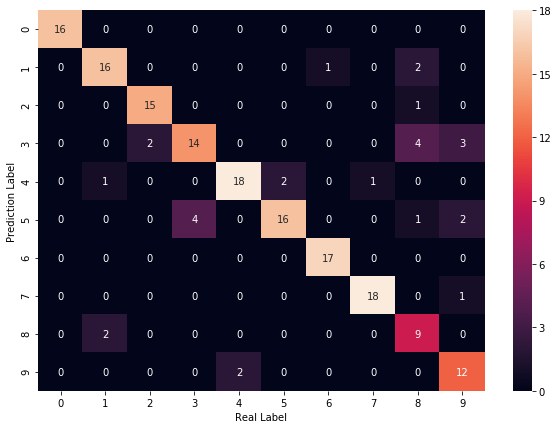

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:7 index:[5] real:5
#1 min_error:9 index:[3] real:2
#2 min_error:11 index:[8] real:8
#3 min_error:2 index:[0] real:0
#4 min_error:9 index:[1] real:1
#5 min_error:5 index:[7] real:7
#6 min_error:6 index:[6] real:6
#7 min_error:4 index:[3] real:3
#8 min_error:2 index:[2] real:2
#9 min_error:7 index:[1] real:1
#10 min_error:8 index:[7] real:7
#11 min_error:15 index:[9] real:4
#12 min_error:8 index:[6] real:6
#13 min_error:8 index:[3] real:3
#14 min_error:6 index:[1] real:1
#15 min_error:10 index:[3] real:3
#16 min_error:13 index:[7] real:9
#17 min_error:4 index:[1] real:1
#18 min_error:13 index:[7] real:7
#19 min_error:3 index:[6] real:6
#20 min_error:11 index:[8] real:8
#21 min_error:5 index:[4] real:4
#22 min_error:6 index:[3] real:3
#23 min_error:12 index:[1] real:1
#24 min_error:4 index:[4] real:4
#25 min_error:6 index:[0] real:0
#26 min_error:7 index:[5] real:5
#27 min_error:6 index:[3] real:3
#28 min_error:10 index:[6] real:6
#29 min_error:13 index:[3 9] real:9
#30 min_e

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8849721706864564
Avg Base Learner:0.8408712980141553


In [16]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.07777777777777778
Accuracy on training set: 0.16666666666666666
Accuracy on training set: 0.25
Accuracy on training set: 0.29444444444444445
Accuracy on training set: 0.36666666666666664
Accuracy on training set: 0.4444444444444444
Accuracy on training set: 0.4888888888888889
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.6222222222222222
Accuracy on training set: 0.6166666666666667
Accuracy on training set: 0.6944444444444444
Accuracy on training set: 0.6833333333333333
Accuracy on training set: 0.6944444444444444
Accuracy on training set: 0.7166666666666667
Accuracy on training set: 0.7222222222222222
Accuracy on training set: 0.7055555555555556
Accuracy on training set: 0.7555555555555555
Accuracy on training set: 0.7444444444444445
Accuracy on training set: 0.7722222222222223
Accuracy on training

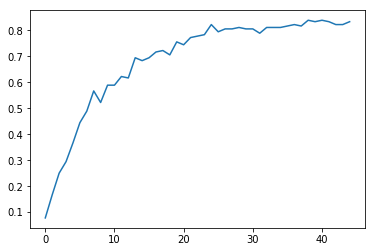

In [17]:
plt.plot(range(45),list_acc)
plt.show()

In [18]:
list_acc

[0.07777777777777778,
 0.16666666666666666,
 0.25,
 0.29444444444444445,
 0.36666666666666664,
 0.4444444444444444,
 0.4888888888888889,
 0.5666666666666667,
 0.5222222222222223,
 0.5888888888888889,
 0.5888888888888889,
 0.6222222222222222,
 0.6166666666666667,
 0.6944444444444444,
 0.6833333333333333,
 0.6944444444444444,
 0.7166666666666667,
 0.7222222222222222,
 0.7055555555555556,
 0.7555555555555555,
 0.7444444444444445,
 0.7722222222222223,
 0.7777777777777778,
 0.7833333333333333,
 0.8222222222222222,
 0.7944444444444444,
 0.8055555555555556,
 0.8055555555555556,
 0.8111111111111111,
 0.8055555555555556,
 0.8055555555555556,
 0.7888888888888889,
 0.8111111111111111,
 0.8111111111111111,
 0.8111111111111111,
 0.8166666666666667,
 0.8222222222222222,
 0.8166666666666667,
 0.8388888888888889,
 0.8333333333333334,
 0.8388888888888889,
 0.8333333333333334,
 0.8222222222222222,
 0.8222222222222222,
 0.8333333333333334]